#OPTIMIZATION ALGORITHM
Mathematically, an optimization problem is defined by an objective function $f(x)$ which depends on a set of variables $x$ (parameters).
 Training a machine learning model often boils
down to finding a good set of parameters. The notion of “good” is determined by the objective function, in particular finding its best value using optimization algorithms. Assuming that object function is differentiable (so we have acces to a gradient at each location in the space), we can optimize the algorithm by minimizing our "loss function". Intuitively finding the best value is like finding the valleys of the function, moving in the opposite direction of the gradient(which points uphill). Basing on this concept we can use gradient descent algorithm to solve linear system of equations.  





# GRADIENT DESCENT
Considering the problem of solving for the minimum of a real-valued function $\min_{x}f(x)$ where $f :  R^N\rightarrow R $ is an objective function. We assume it is differentiable, and we are unable to analytically find a solution. Gradient descent is a first-order optimization algorithm.To find a local
minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point.
Keeping in mind that that the gradient points in the direction of the
convention of steepest ascent. Hence, this is an iterative process.


Let us consider a bi-dimensional function. Imagine a surface with a ball starting at a particular location $x_0$. If we release the ball, it will downhill in the direction of steepest descent. So this method exploits the fact that $f(x_0)$ decreases fastest in the direction of the negative gradient: $-((∇f)(x_0))$.

If we want to find a local minimum, we start with an initial guess of the prameters we wish to optimize and then iterate according to:

$x_{i+1} = x_i - γ_i((∇f)(x_i))$

Where $γ_i$ it is our step-size( or learning rate).

The sequence $f(x_0)\geq f(x_1)\geq ... $converges to a local minimum.

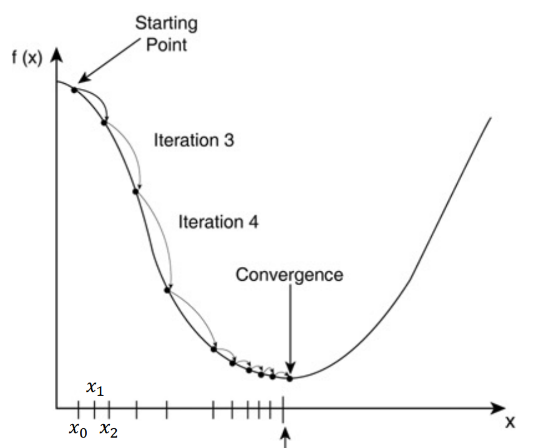

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def gradient(f, x ,h = 0.000001):
  return (f(x+h)-f(x-h))/(2*h)

def gradient_descent(x0, f, stepsize, eps):
  points = [x0]
  diff = 1
  while abs(diff)> eps:
      x = x0 - stepsize*gradient(f, x0)
      diff = f(x)-f(x0)
      print(gradient(f,x0))
      points.append(x)
      x0 = x
  return x0, np.array(points)

34.00000001718695
34.828784023943626
31.095922096824324
23.025584638958208
13.72641519736817
6.700584712859836
2.8449569526856067
1.1208814711949344
0.4271778095699119
0.1606417896482526
0.060101044141447346
0.022442222302743176
0.008373966409180866
-4.480218659430932 [-3.         -3.34       -3.68828784 -3.99924706 -4.22950291 -4.36676706
 -4.43377291 -4.46222248 -4.47343129 -4.47770307 -4.47930949 -4.4799105
 -4.48013492 -4.48021866]


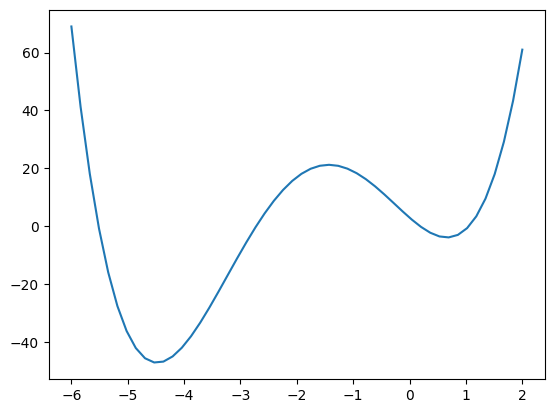

In [90]:
func = lambda x: x**4+7*x**3+5*x**2-17*x+3
stepsize = 0.01
eps = 0.000001
xmin, points = gradient_descent(-3, func,stepsize,eps)
x = np.linspace(-6, 2)
plt.plot(x, func(x))
print(xmin, points)

34.00000001718695
34.828784023943626
31.095922096824324
23.025584638958208
13.72641519736817
6.700584712859836
2.8449569526856067
1.1208814711949344
0.4271778095699119
0.1606417896482526
0.060101044141447346
0.022442222302743176
0.008373966409180866


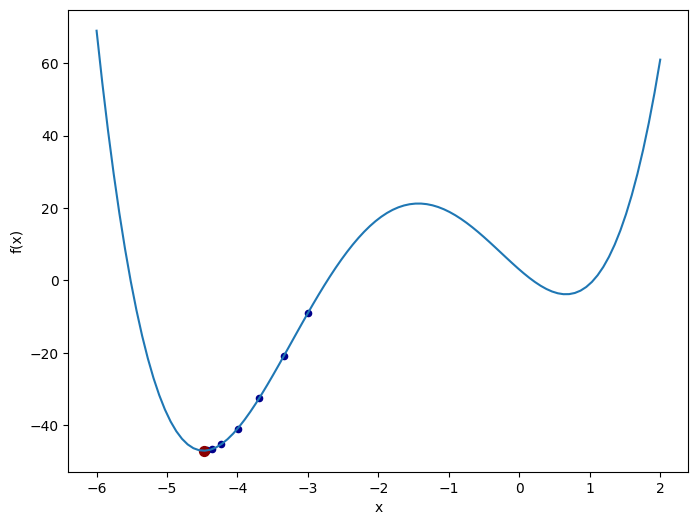

[-3.         -3.34       -3.68828784 -3.99924706 -4.22950291 -4.36676706
 -4.43377291 -4.46222248 -4.47343129 -4.47770307 -4.47930949 -4.4799105
 -4.48013492 -4.48021866]


In [92]:
plt.figure(figsize=(8,6), dpi=100)
xs = np.linspace(-6, 2, 100)
ys = func(xs)
xmin, points = gradient_descent(-3, func, 0.01, 0.000001)
plt.plot(xs, ys)
plt.scatter(points, func(points), color='darkblue', s=20)
plt.scatter(xmin, func(xmin), color='darkred', s=50)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
print(points)

[[-3.00000000e+00 -1.00000000e+00]
 [-1.92000000e+00  1.34000000e+00]
 [-1.24500000e+00 -6.29200000e-01]
 [-5.14272000e-01  8.85410000e-01]
 [-5.13899400e-02 -3.92043520e-01]
 [ 4.43144166e-01  5.88259911e-01]
 [ 7.60434824e-01 -2.40490903e-01]
 [ 1.09520074e+00  3.93953589e-01]
 [ 1.31260878e+00 -1.43730937e-01]
 [ 1.53927499e+00  2.66849959e-01]
 [ 1.68818899e+00 -8.20147162e-02]
 [ 1.84169630e+00  1.83674764e-01]
 [ 1.94366024e+00 -4.26924778e-02]
 [ 2.04764372e+00  1.29224561e-01]
 [ 2.11743764e+00 -1.76675833e-02]
 [ 2.18788894e+00  9.35646793e-02]
 [ 2.23564811e+00 -1.76174845e-03]
 [ 2.28339001e+00  7.02010686e-02]
 [ 2.31606171e+00  8.33404422e-03]
 [ 2.34842054e+00  5.48872105e-02]
 [ 2.37076499e+00  1.47323830e-02]
 [ 2.39270138e+00  4.48452442e-02]
 [ 2.40797906e+00  1.87806804e-02]
 [ 2.42285257e+00  3.82573403e-02]
 [ 2.43329595e+00  2.13373967e-02]
 [ 2.44338231e+00  3.39334476e-02]
 [ 2.45051948e+00  2.29488341e-02]
 [ 2.45736058e+00  3.10941792e-02]
 [ 2.46223720e+00  2

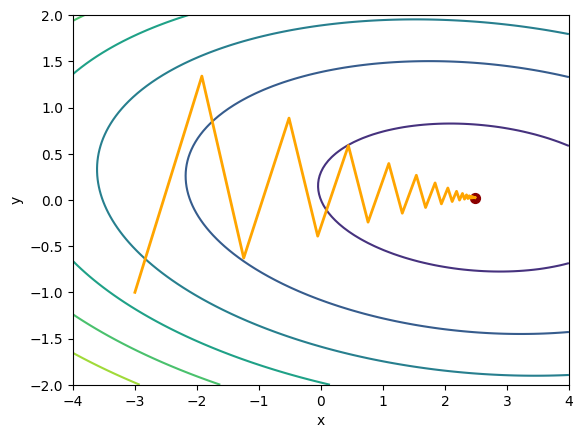

In [93]:
x0 = (-3 , -1)
def f(x1, x2):
    return x1**2 +x1*x2 +10*x2**2-5*x1 -3*x2

def gradient_descent_bid(x0, f_1, f_2, stepsize, eps):
  x0 = np.array(x0)
  points = [x0]
  diff = 1
  while abs(diff)> eps:
      x = np.array((x0[0] - stepsize*f_1(x0[0], x0[1]),x0[1]- stepsize*f_2(x0[0],x0[1])))
      diff = np.linalg.norm(x - x0)
      #diff = (f_1(x[0],x[1]),f_2(x[0],x[1]))-(f_1(x0[0], x0[1]),f_2(x0[0],x0[1]))
      #print(gradient(f,x0))
      points.append(x)
      x0 = x
  return x0, np.array(points)

def f_der_x1(x1, x2):
  return 2*x1+x2-5

def f_der_x2(x1,x2):
  return x1+20*x2-3

x1, points = (gradient_descent_bid(x0,f_der_x1, f_der_x2, 0.09, 0.00001))
print(points)

v_func = np.vectorize(f)
x, y = np.meshgrid(np.linspace(-4, 4, 100),np.linspace(-2, 2, 100))


fig, ax = plt.subplots(1)
ax.contour(x, y, v_func(x, y))
plt.plot(points[:,0], points[:,1], color='orange', linewidth=2)
plt.scatter(x1[0], x1[1], color='darkred', s=50)
#plt.scatter(points[:,0], points[:,1], color='darkblue', s=20)
#plt.scatter(x1[0], x1[1], color='darkred', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

A property of the gradient is that it points in a direction that is orthogonal to the contour lines of the function we want to optimize. So in a long thin valley, the convergence slow down because the gradient points almost ortoghonally to the shortest path to the minimum.


# Step size

Choosing the right step-size is important because it affects the convergence of the algorithm. If it is too small the gradient descent can be slow, otherwise if its too large, it can overshoot the minimum or diverge.
A way to overcome this problem could be using an adaptive gradient, rescaling the step-size at each iteration, depending on local properties of the function. There are two intuitive ways to change $\gamma$:

*   when the function increases after a gradient step, the step-size was too large, so undo the step and decrease it;
*   when the function decreases, maybe the step could have been larger. Try to increase it.

This method could be waste of recources but it garantees monotonic convergence.



In [ ]:
plt.figure(figsize=(8,6), dpi=100)
xs = np.linspace(-6, 2, 100)
ys = func(xs)
xmin, points = gradient_descent(-3, func, 0.07, 0.000001)
plt.plot(xs, ys)
plt.scatter(points, func(points), color='darkblue', s=20)
plt.scatter(xmin, func(xmin), color='darkred', s=50)
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.show()


# Gradient descent with momentum

As we have seen, the convergence of gradient descent may be very slow if the curvature of the optimization surface is such that there are regions thar are poorly scaled. There is a method to improve convergence, giving to gradient descent a memory. This is called "Gradient descent with momentum". It is based on adding a term which remember what happened in the previous iteration. This memory dampens oscillations and smoothes out the gradient updates. The idea is to have a gradient update with memory to implement a moving average. To implement this kind of memory it should be considered the update $\Delta x_i$ at each iteration i and determine the next update as a linear combination of the current and previous gradients:

$x_{i+1} = x_i - γ_i((∇f)(x_i))^T + αΔ x_i$

$Δ x_i =x_i - x_{i-1} = αΔ x_{i-1} - γ_{i-1}((∇f)(x_{i-1}))^T $


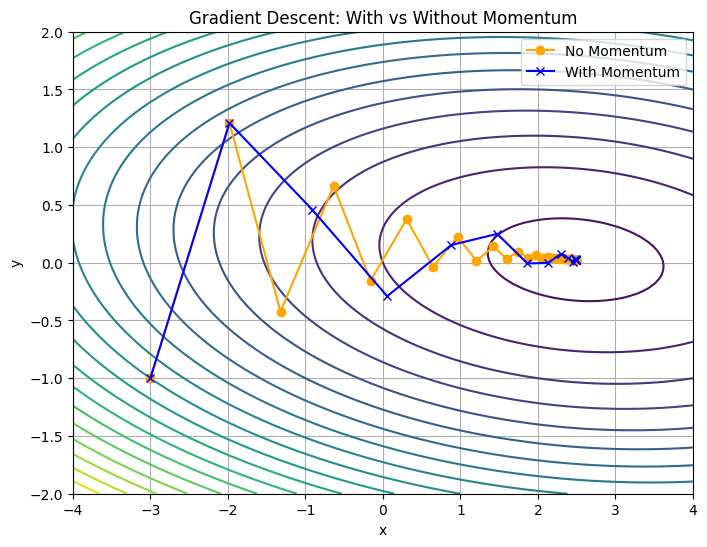

66 29


In [94]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return x1**2 +x1*x2 +10*x2**2-5*x1 -3*x2
# Funzione e gradienti
def f_der_x1(x1, x2):
  return 2*x1+x2-5

def f_der_x2(x1,x2):
  return x1+20*x2-3

# Gradient descent standard
def gradient_descent(x0, f_1, f_2, stepsize, eps):
    x0 = np.array(x0)
    points = [x0]
    diff = 1
    while diff > eps:
        x = np.array([x0[0] - stepsize * f_1(x0[0], x0[1]),
                      x0[1] - stepsize * f_2(x0[0], x0[1])])
        diff = np.linalg.norm(x - x0)
        points.append(x)
        x0 = x
    return x0, np.array(points)

# Gradient descent con momentum
def gradient_descent_momentum(x0, f_1, f_2, stepsize, eps, alpha):
    x0 = np.array(x0)
    velocity = np.array([0.0, 0.0])  # Inizializza la velocità
    points = [x0]
    diff = 1
    while diff > eps:
        grad = np.array([f_1(x0[0], x0[1]), f_2(x0[0], x0[1])])
        velocity = alpha * velocity - stepsize * grad
        x = x0 + velocity
        diff = np.linalg.norm(x - x0)
        points.append(x)
        x0 = x
    return x0, np.array(points)

# Parametri
x0 = (-3, -1)  # Punto di partenza
stepsize = 0.085  # Passo di discesa
eps = 1e-5  # Criterio di arresto
alpha = 0.4  # Momentum

# Calcoli
x1, points = gradient_descent(x0, f_der_x1, f_der_x2, stepsize, eps)
x2, points2 = gradient_descent_momentum(x0, f_der_x1, f_der_x2, stepsize, eps, alpha)

# Visualizzazione
v_func = np.vectorize(f)
x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-2, 2, 100))

fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(x, y, v_func(x, y), levels=20, cmap='viridis')
plt.plot(points[:, 0], points[:, 1], color='orange', label='No Momentum', marker='o')
plt.plot(points2[:, 0], points2[:, 1], color='blue', label='With Momentum', marker='x')
plt.title('Gradient Descent: With vs Without Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
print(len(points),len(points2))


# Gradient Descent Types
There are three main different type of Gradient Descent: Batch, Mini-Batch and Stochastic, which differs from each other in the amount of data used in each parameter update. \
###Batch
In batch gradient descent, the loss for all the points in the training set are averaged, and the model (weight) is updated only after evaluating all the training examples in a single training iteration.
The advantage of this method is that it gives a more accurate value for the gradient. The parameter update is less frequent but more stable. One drawback of batch gradient descent is that the stable error gradient can sometimes lead to convergence at a suboptimal solution, failing to reach the best possible model performance.


*   Pros: More accurate updates, stable convergence
*   Cons: Slow on big datasets, inefficient in memory


###Stochastic (SGD)
In SGD, the gradient is computed for only one randomly selected partition of the shuffled dataset during each iteration, instead of using the entire dataset. This modification significantly reduces computational time. However, because SGD iterates one observation at a time, When compared to GD, which evaluates the complete dataset in each iteration, it may produce noisier results. So it implies a very frequent parameter update, but less stable and subject to fluctuations.


*   Pros: Cheaper in memory, very good for dinamc datasets
*   Cons: High oscillations, less stable convergence

###Mini-batch
This is balanced between batch gradient descent and stochastic gradient descent. Here the data is splitted into small batches and then compute loss for each. The weights are updated after each batch.


*   Pros: Trade-off between speed and stability, easy to work on parallel hardware
*   Cons: Depends on batch dimension










#Stochastic Gradient Descent
Computing the gradient can be very time consuming. However, often it is
possible to find a “cheap” approximation of the gradient. Approximating
the gradient is still useful as long as it points in roughly the same direction
as the true gradient. SGD is a stochastic approximation of the gradient descent method for minimizing an objective function that is written as a sum of differentiable functions such as the sum of the losses $L_n$:\
$L(\theta)= \sum_{n=1}^NL_n(\theta)$ \
where $\theta$ is the vector of parameters we want to find to minimize the loss $L$

Standard gradient descent ("batch") updates the vector of parameters according to:

$θ _{i+1} $ = $θ_i - γ_i(∇Lθ_i)^T $ = $θ_i - γ_i\sum_{n=1}^N(∇L_n(θ_i))^T $ for a suitable $γ_i $.

Considering the sum term, in step by step evaluated a subset of $L_n$ for mini-batch GD. In stochastic GD is randomly selected only a single $L_n$ to estimate the gradient.
The key insight about why taking a subset of data is sensible to realize that gradient descent converges, is that we only require that the gradient is an
unbiased estimate of the true gradient. In fact the term $\sum_{n=1}^N(∇L_n(θ_i))$
is an empirical estimate of the expected value of the gradient. Therefore, any other unbiased empirical estimate of the expected value, would suffice
for convergence of gradient descent.


In [ ]:
#confrontare la convergenza dei tre metodi

# Gradient descent to minimize Cross-Entropy

The concept of cross-entropy traces its roots back to the field of information theory, where information entropy, also known as Shannon entropy, was introducesd in 1948. Entropy calculates the degree of randomness or disorder within a system. In the context of information theory, the entropy of a random variable is the average uncertainty, surprise, or information inherent to the possible outcomes (usually measured in Bit). Formally , being X an event source x, entropy associated to a single event is :

$I(x) = -log_b p(x)$ ,
where p(x) is probability that the event occur.

In the case of information sources, entropy is defined as:

$ H = -K\sum_{i}p(x_i)logp(x_i)$.


The cross-entropy between two probability distributions
$p$ and $q$ , over the same underlying set of events, measures the average number of bits needed to identify an event drawn from the set when the coding scheme used for the set is optimized for an estimated probability distribution
$q$, rather than the true distribution $p$.

We can use cross-entropy as a loss function in problem of classification:

$J(w, b)= -\frac{1}{n}\sum_{i=1}^{n}\left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$  

 for N data points where $y_i$ is the truth value and $\hat{y_i}$ is the probability predicted for the $i^{th}$ data point through the sigmoid function(for binary classification) or softmax function(for multi-class classifcation).





Final weights: [ 6.95190337 -4.81034288]
Final bias: -0.7362770587496903


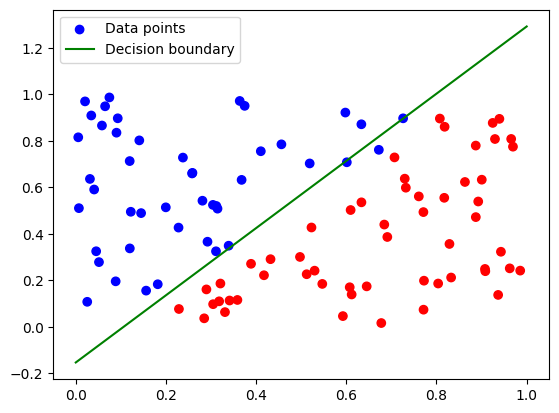

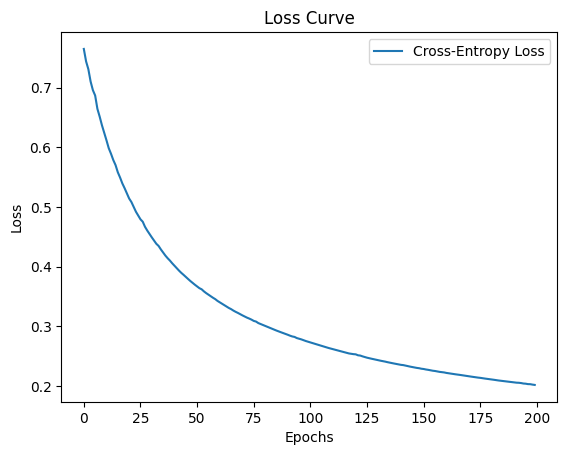

In [95]:

import numpy as np
import matplotlib.pyplot as plt

# Genera dati per classificazione
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 punti, 2 caratteristiche
true_weights = np.array([3, -2])  # Pesi reali
true_bias = -0.5
linear_combination = X @ true_weights + true_bias
y = (linear_combination > 0).astype(int)  # Classi 0 o 1

# Parametri iniziali
w = np.random.randn(2)
b = np.random.randn()
learning_rate = 0.01
n_epochs = 200
n_points = len(X)

# Funzione sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Funzione costo Cross-Entropy
def cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Per tracciare la curva della funzione di costo
losses = []

# SGD per minimizzare la cross-entropy
for epoch in range(n_epochs):
    for i in range(n_points):
        # Campione casuale
        random_point = np.random.randint(0, n_points)
        xi, yi = X[random_point], y[random_point]

        # Predizione
        y_pred = sigmoid(np.dot(w, xi) + b)

        # Gradienti
        gradient_w = (y_pred - yi) * xi
        gradient_b = (y_pred - yi)

        # Aggiornamento dei parametri
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    # Calcola la perdita media (opzionale per monitoraggio)
    y_preds = sigmoid(X @ w + b)
    loss = cross_entropy(y, y_preds)
    losses.append(loss)

# Stampa dei parametri finali
print(f"Final weights: {w}")
print(f"Final bias: {b}")

# Plot dei dati e decision boundary
x1 = np.linspace(0, 1, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", label="Data points")
plt.plot(x1, x2, color="green", label="Decision boundary")
plt.legend()
plt.show()

# Plot della funzione di costo
plt.plot(losses, label="Cross-Entropy Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()



In [96]:
#sistemi lineari

In [97]:
#regressione semplice e multipla

**Linear regression**

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more indipendent features by fitting a linear to observed data. The interpretability of linear regression is a strenght point for it. The model's equation provides coefficients that clarify the impact of each indipendent variable on the dipendent ones.

An optimization problem so could be finding the best linear function that maps the input space X, to the the output space of the variable Y. As we try to model the relation between, the set function that the learning algorithm is allowed to select is:
$Y = f(X) = aX + b$ where a, b in $R$.

How do we choose the values for parameters a, b and how do we judge if it's a good guess or not? As we have seen before it is needed to minimize the loss function that in this case is:

$
l(a, b) = (y_i - (a \cdot x_i + b))^2
$.

The squared loss penalizes the difference between the actual y outcome and the outcome estimated by choosing values for the set of parameters a, b. To evaluate our decision on all the training points we compute the average of the square of errors:

MSE = $R_n(a,b)$ = $1/2n\sum_{=i1}^N(y_i-(a*x_i + b ))^2$ where n is the number of data points.
$R_n(a,b)$ is a quadratic function, hence it's minimum always exists.

The goal is to find a, b coefficients that minimize MSE. We want to use gradient descent.

We have to initialize a and b values. Compute the gradient of the mean squared error with respect to a and b :

$\
\frac{\partial R_n(a, b)}{\partial a} = \frac{1}{n} \sum_{i=1}^{n} \left( x_i \cdot \left( (a \cdot x_i + b) - y_i \right) \right)
\$


$\frac{\partial R_n(a, b)}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \left( (a \cdot x_i + b) - y_i \right)\$ .


Then update values of a and b as we know:

$ a = a -η\
\frac{\partial R_n(a, b)}{\partial a}$ ,

$b = b -η\frac{\partial R_n(a, b)}{\partial b}$.

Repat those steps until the decrease of the mean squared error loss is lower than a threshold ϵ.



Estimated parameters: a = [2.8701216], b = [4.20218274]


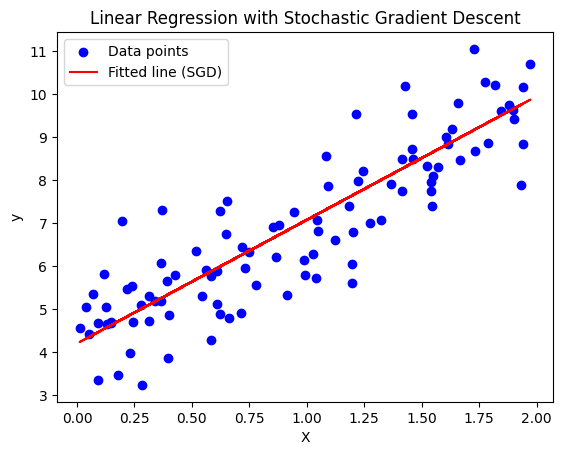

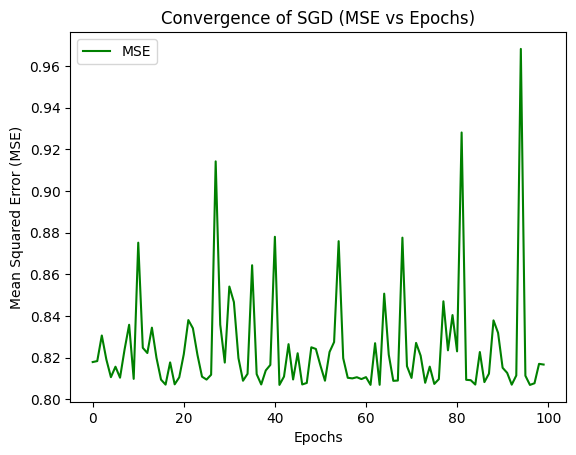

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Generate pseudo-random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  + np.random.randn(100, 1)  # True function: y = 4 + 3x + noise

# Hyperparameters
learning_rate = 0.01
n_epochs = 100
n_points = len(X)

# Initialize parameters
a, b = np.random.randn(), np.random.randn()

# List to store the MSE for each epoch (for plotting convergence curve)
mse_history = []

# SGD Loop
for epoch in range(n_epochs):
    for i in range(n_points):
        # Pick a random data point
        random_point = np.random.randint(0, n_points)
        xi, yi = X[random_point], y[random_point]

        # Compute gradients
        gradient_a = -2 * xi * (yi - (a * xi + b))
        gradient_b = -2 * (yi - (a * xi + b))

        # Update parameters
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

    # Calculate the Mean Squared Error (MSE) for this epoch
    y_pred = a * X + b
    mse = np.mean((y - y_pred) ** 2)
    mse_history.append(mse)

# Print estimated parameters
print(f"Estimated parameters: a = {a}, b = {b}")

# Plot the data points and the fitted line
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, a * X + b, color="red", label="Fitted line (SGD)")
plt.legend()
plt.title("Linear Regression with Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Plot the MSE convergence curve
plt.plot(mse_history, color="green", label="MSE")
plt.title("Convergence of SGD (MSE vs Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()



Epoch 0: MSE = 79.9326, a = 0.6425, b = 0.4907
Epoch 100: MSE = 42.6955, a = 0.7844, b = 4.7320
Epoch 200: MSE = 36.8470, a = 0.4211, b = 7.0955
Epoch 300: MSE = 34.9243, a = 0.2129, b = 8.4507
Epoch 400: MSE = 34.2922, a = 0.0934, b = 9.2277
Epoch 500: MSE = 34.0844, a = 0.0250, b = 9.6732
Epoch 600: MSE = 34.0161, a = -0.0143, b = 9.9286
Epoch 700: MSE = 33.9936, a = -0.0368, b = 10.0751
Epoch 800: MSE = 33.9862, a = -0.0497, b = 10.1591
Epoch 900: MSE = 33.9838, a = -0.0571, b = 10.2072

Optimal parameters found:
 a = -0.0613, b = 10.2346


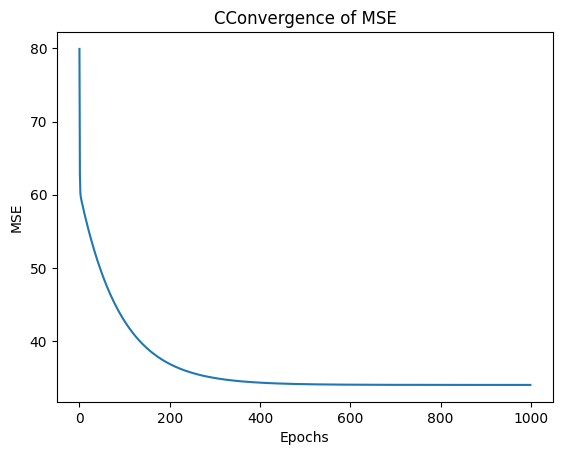

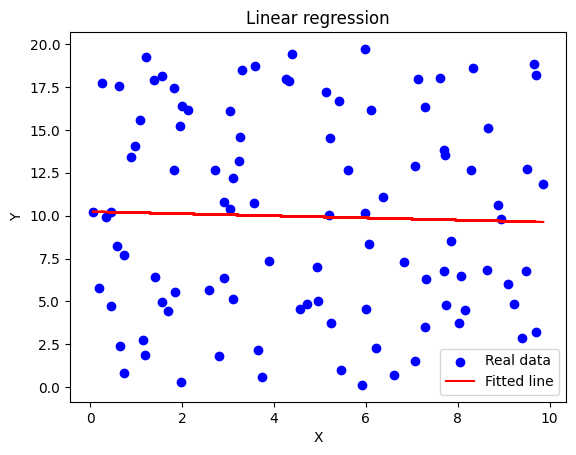

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random variable
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = np.random.rand(100, 1) * 20

def compute_mse(X, Y, a, b):
    predictions = a * X + b
    error = Y - predictions
    mse = np.mean(error**2)
    return mse

def gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    # Starting parameters
    a = np.random.randn()
    b = np.random.randn()
    n = len(X)
    # MSE history
    mse_history = []

    for epoch in range(epochs):
        predictions = a * X + b
        gradient_a = -2 * np.mean(X * (Y - predictions))
        gradient_b = -2 * np.mean(Y - predictions)

        # Update parameters
        a = a - learning_rate * gradient_a
        b = b - learning_rate * gradient_b

        mse = compute_mse(X, Y, a, b)
        mse_history.append(mse)

        # Progresses
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: MSE = {mse:.4f}, a = {a:.4f}, b = {b:.4f}')

    return a, b, mse_history

# Execute gradient descent
a_opt, b_opt, mse_history = gradient_descent(X, Y, learning_rate=0.01, epochs=1000)


print(f'\nOptimal parameters found:\n a = {a_opt:.4f}, b = {b_opt:.4f}')

# MSE progression
plt.plot(mse_history)
plt.title('CConvergence of MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Regression line
plt.scatter(X, Y, color='blue', label='Real data')
plt.plot(X, a_opt * X + b_opt, color='red', label='Fitted line')
plt.title('Linear regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [100]:
import numpy as np  #confrontare con MSE

# Definizione del sistema lineare
np.random.seed(0)  # Per la riproducibilità
A = np.random.rand(3, 3)  # Matrice 3x3
b = np.array([1, 0, 1])  # Vettore dei risultati

# Funzione di perdita cross-entropy
def cross_entropy_loss(y_pred, y_true):
    # Clipping per evitare log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)

# Gradiente della loss rispetto a x
def gradient(A, x, b):
    y_pred = 1 / (1 + np.exp(-A @ x))  # Sigmoide
    return A.T @ (y_pred - b)  # Gradiente

# Gradient descent
def gradient_descent(A, b, lr=0.1, epochs=1000):
    x = np.random.rand(A.shape[1])  # Inizializzazione casuale di x
    for epoch in range(epochs):
        # Predizione
        y_pred = 1 / (1 + np.exp(-A @ x))  # Sigmoide
        # Calcolo della perdita
        loss = cross_entropy_loss(y_pred, b)
        # Aggiornamento dei pesi
        grad = gradient(A, x, b)
        x -= lr * grad

        # Stampa della perdita ogni 100 iterazioni
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return x

# Esecuzione del gradient descent
x_solution = gradient_descent(A, b, lr=0.1, epochs=1000)
print("Soluzione trovata x:", x_solution)

# Verifica
y_pred_final = 1 / (1 + np.exp(-A @ x_solution))
print("Predizione finale:", y_pred_final)


Epoch 0, Loss: 0.5811
Epoch 100, Loss: 0.4903
Epoch 200, Loss: 0.4212
Epoch 300, Loss: 0.3665
Epoch 400, Loss: 0.3227
Epoch 500, Loss: 0.2872
Epoch 600, Loss: 0.2580
Epoch 700, Loss: 0.2337
Epoch 800, Loss: 0.2133
Epoch 900, Loss: 0.1958
Soluzione trovata x: [-5.63447529  8.77384234 -2.57362073]
Predizione finale: [0.8363611  0.26593671 0.94677831]
